In [6]:
from google.colab import drive
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [14]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [15]:
# My data is in google drive.
train_dir ="/content/drive/MyDrive/Graduation Project/PDD Dataset/train"
test_dir="/content/drive/MyDrive/Graduation Project/PDD Dataset/test"

In [16]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [17]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

13 Classes
24047 Train images
0 Test images


In [18]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [19]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 24047 images belonging to 13 classes.
Found 0 images belonging to 0 classes.


In [11]:
train_generator.class_indices

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 10,
 'Tomato___Tomato_mosaic_virus': 11,
 'Tomato___healthy': 12}

In [20]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [21]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


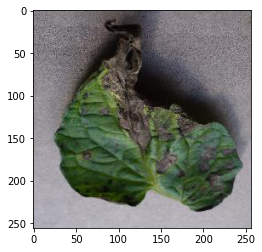

In [22]:
# Take one image to visualize it's changes after every layer
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Graduation Project/PDD Dataset/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Graduation Project/PDD Dataset/train/Tomato___Early_blight/0034a551-9512-44e5-ba6c-827f85ecc688___RS_Erly.B 9432.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [23]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_output.predict(img)

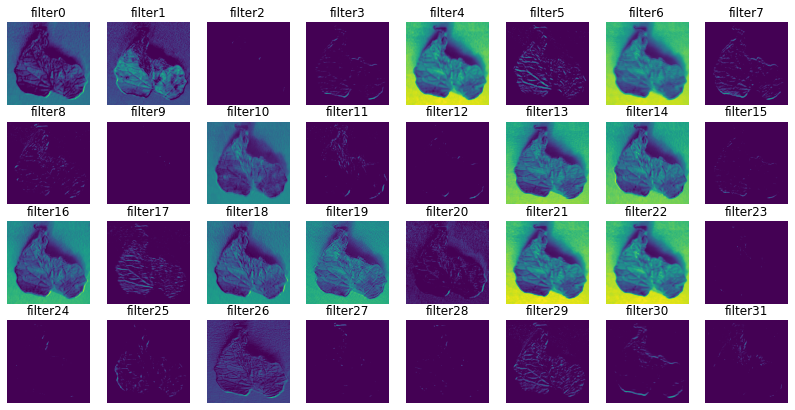

In [16]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

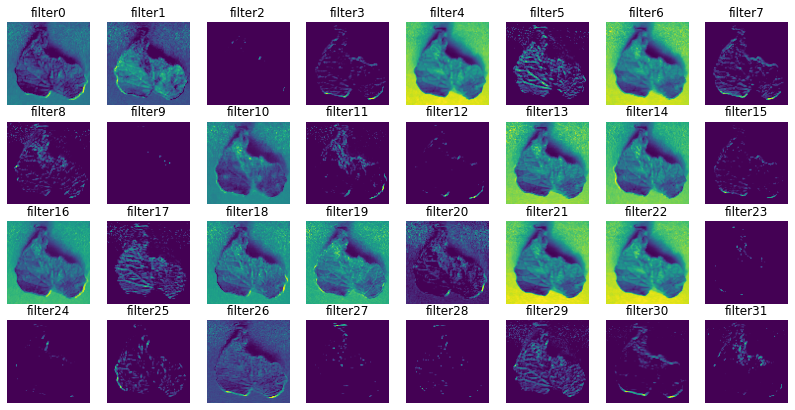

In [17]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

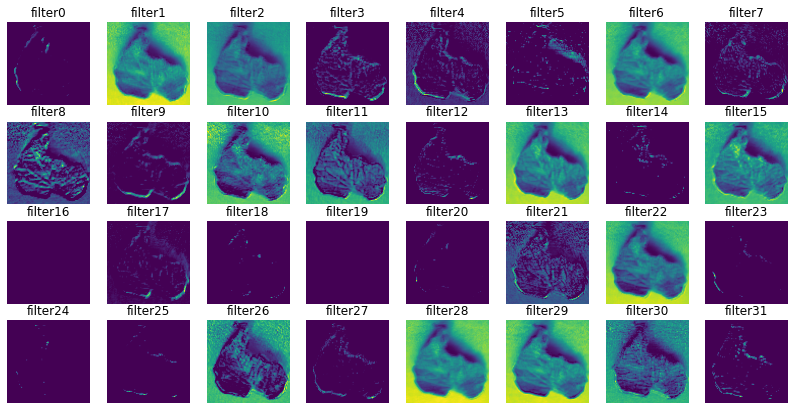

In [18]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

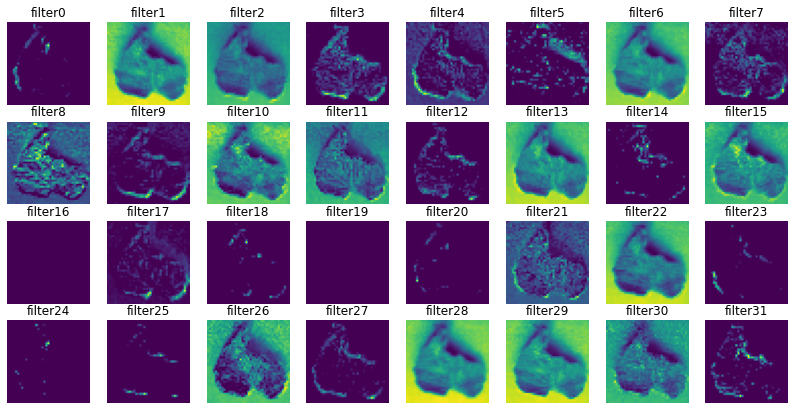

In [19]:
# we can also visualize in color mode.
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

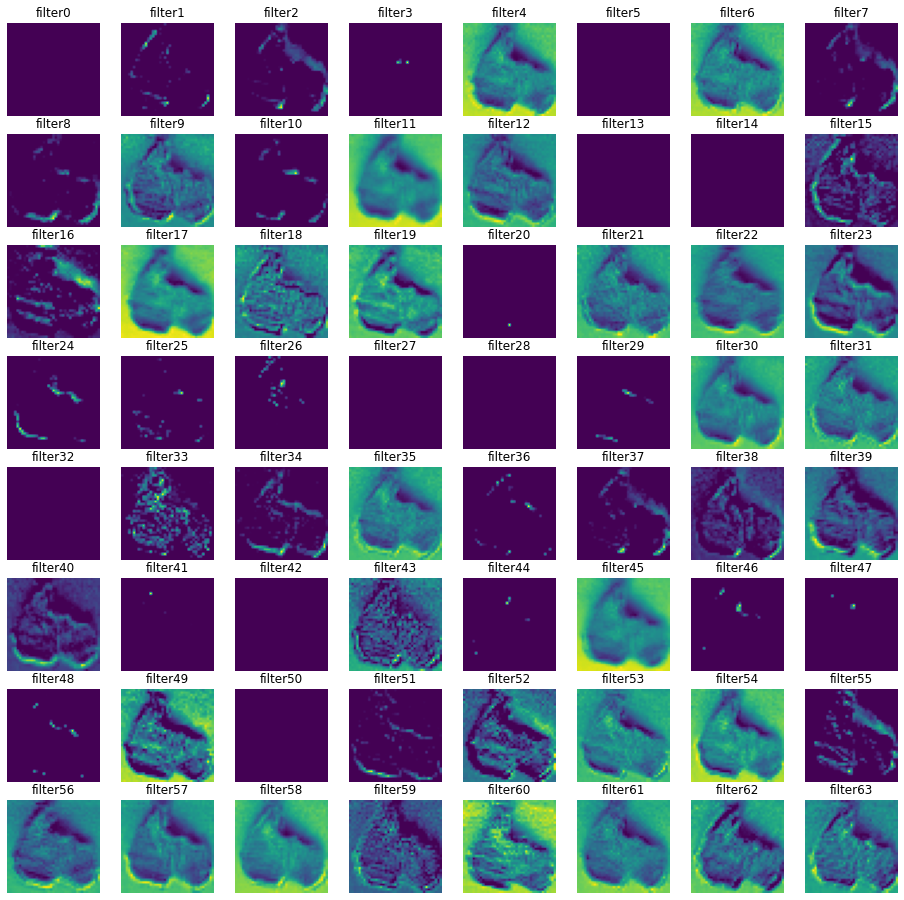

In [21]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

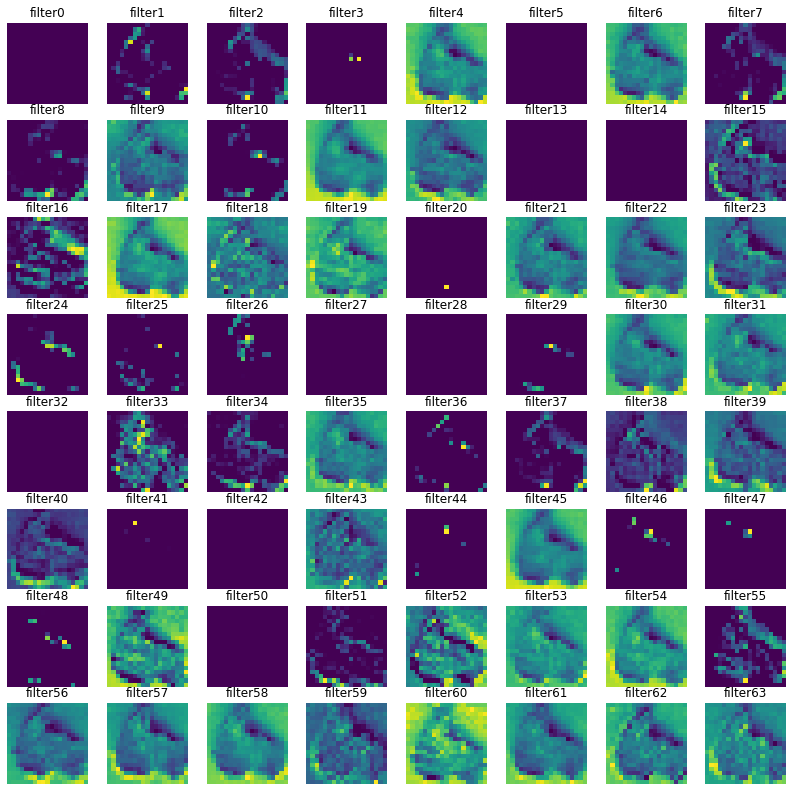

In [22]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

In [24]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 24047 images belonging to 13 classes.


In [27]:
# Model building to get trained with parameters.
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

train=model.fit_generator(train_generator,
                        epochs=15,
                          steps_per_epoch=train_generator.samples //  batch_size,verbose=1)



Epoch 1/15


KeyboardInterrupt: ignored

In [25]:
acc = train.history['accuracy']

loss = train.history['loss']

epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')

plt.title('Training accurarcy')
plt.legend()

plt.figure()
#Train and validation loss

plt.plot(epochs, loss, 'r', label='Trainning loss')
plt.title('Training loss')
plt.legend()
plt.show()

NameError: ignored

In [11]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('PDD.h5')

NameError: ignored

In [12]:
# Save model weights.
from keras.models import load_model
model.save_weights('PDD_weights.h5')

NameError: ignored

In [57]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Potato___Early_blight': 0,
 'Potato___Late_blight': 1,
 'Potato___healthy': 2,
 'Tomato___Bacterial_spot': 3,
 'Tomato___Early_blight': 4,
 'Tomato___Late_blight': 5,
 'Tomato___Leaf_Mold': 6,
 'Tomato___Septoria_leaf_spot': 7,
 'Tomato___Spider_mites Two-spotted_spider_mite': 8,
 'Tomato___Target_Spot': 9,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 10,
 'Tomato___Tomato_mosaic_virus': 11,
 'Tomato___healthy': 12}

In [59]:
# Loading model and predict.
from keras.models import load_model
model=load_model('PDD.h5')

Classes = ["Potato___Early_blight","Potato___Late_blight","Potato___healthy","Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_Yellow_Leaf_Curl_Virus","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_classes([prepare('/content/drive/MyDrive/Graduation Project/PDD Dataset/test/PotatoEarlyBlight1.JPG')])
disease=image.load_img('/content/drive/MyDrive/Graduation Project/PDD Dataset/test/PotatoEarlyBlight1.JPG')
plt.imshow(disease)
print (Classes[int(result)])

NameError: ignored

In [1]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('PDD.h5') 
tfmodel = converter.convert() 
open ("PDD.tflite" , "wb") .write(tfmodel)

AttributeError: ignored